# Use this notebook in the same directory as your FSEC data files.

The code as written just reads all .txt files so make sure your data (and only your data) in the directory is in .txt format! The code also spits out your values in list forms (intensities and time) as well as pandas dataframes for convenience. Larger png will save in the directory as "fig1.png".

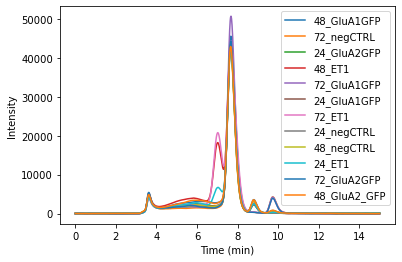

,48_GluA1GFP,72_negCTRL,24_GluA2GFP,48_ET1,72_GluA1GFP,24_GluA1GFP,72_ET1,24_negCTRL,48_negCTRL,24_ET1,72_GluA2GFP,48_GluA2_GFP
0.00000,24,7,12,6,-36,2,19,3,20,-17,-9,-2
0.00833,24,7,12,6,-36,2,19,3,20,-17,-9,-2
0.01667,2,2,-3,-3,-12,2,1,-5,2,10,2,2
0.02500,2,-4,-7,-7,-1,2,2,-13,2,14,12,2
0.03333,1,-3,-1,-9,2,6,5,-10,-3,16,13,3
...,...,...,...,...,...,...,...,...,...,...,...,...
14.96667,-15,-3,39,-9,40,-65,37,-46,100,82,31,-3
14.97500,-19,-8,41,-8,39,-69,33,-45,97,80,30,-6
14.98333,-18,-9,44,-7,43,-71,28,-36,93,79,23,-3
14.99167,-10,-14,41,-6,41,-71,18,-31,98,80,26,6


In [1]:
import glob
file_list = [f for f in glob.glob("*.txt")]
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
fig1_data = {}

for file in file_list:
    raw_file = open(str(file))
    read_file = raw_file.read()
    line_list = read_file.split('\n')
    start = line_list.index('Em. Wavelength(nm)	507')
    end = line_list.index('[LC Status Trace(Pump A Pressure)]')
    intensities = []
    time = []
    for line in line_list[start+2:end-1]:
        tab = line.index('\t')
        intensities.append(int(line[tab+1:15]))
        time.append(float(line[0:tab]))
    plt.plot(time,intensities, label = str(file)[:-4])
    plt.savefig('fig1.png', dpi = 300)
    plt.xlabel("Time (min)")
    plt.ylabel("Intensity")
    plt.legend()
    fig1_data[str(file)[:-4]] = intensities
    #fig1_data = pd.DataFrame(intensities, columns=[str(file)])
plt.show()


#DataFrame
fig1_dataFrame = pd.DataFrame(fig1_data, index = time)
fig1_dataFrame